In [6]:
# Signal Processing Demo

#This notebook demonstrates basic sensor signal processing using Python.

#**Features included:**
#- Synthetic sensor signal generation
#- Noise modeling
#- Moving average filtering
#- Butterworth low-pass filtering
#- FFT frequency analysis
#- Clean plots and explanations
# This project is part of my engineering portfolio (MEMS + embedded software applications).##

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from numpy.fft import fft, fftfreq

plt.style.use('ggplot')

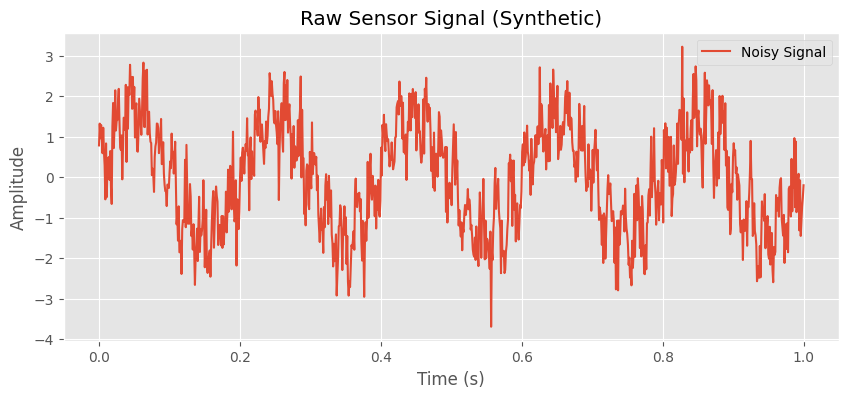

In [8]:
# Generate synthetic sensor signal
fs = 1000  # sampling frequency
t = np.linspace(0, 1, fs)

# Base signal: 5 Hz + 50 Hz components
signal = 1.5*np.sin(2*np.pi*5*t) + 0.7*np.sin(2*np.pi*50*t)

# Add noise
noise = 0.5 * np.random.randn(len(t))
signal_noisy = signal + noise

plt.figure(figsize=(10,4))
plt.plot(t, signal_noisy, label="Noisy Signal")
plt.title("Raw Sensor Signal (Synthetic)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

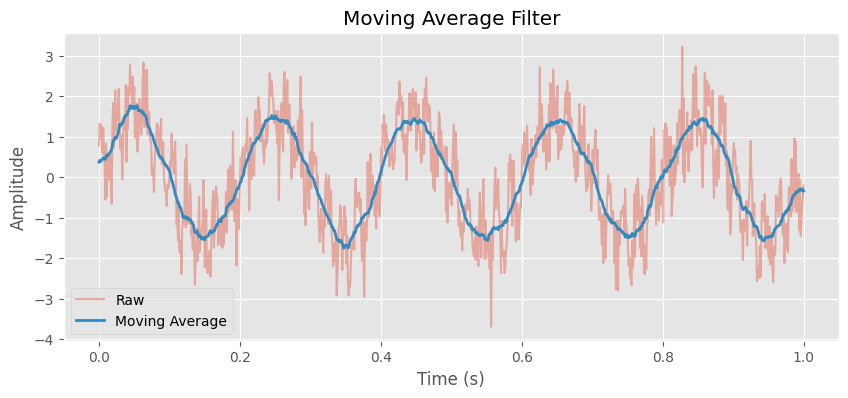

In [9]:
#Moving Average Filter
window = 20
moving_avg = np.convolve(signal_noisy, np.ones(window)/window, mode='same')

plt.figure(figsize=(10,4))
plt.plot(t, signal_noisy, alpha=0.4, label="Raw")
plt.plot(t, moving_avg, label="Moving Average", linewidth=2)
plt.title("Moving Average Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

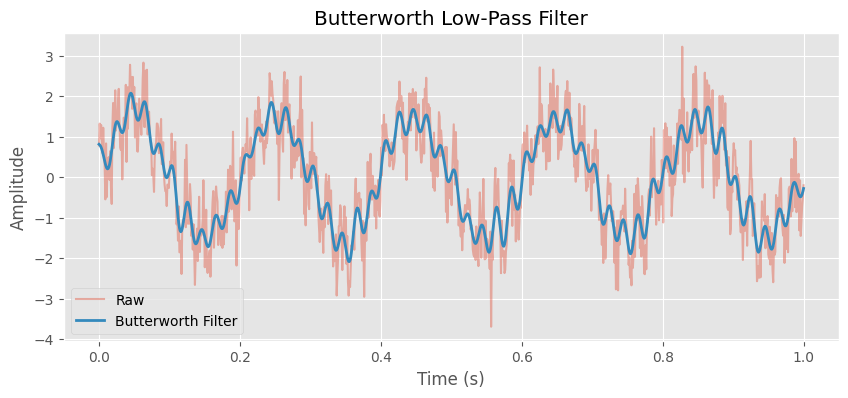

In [10]:
#Butterworth Low-Pass Filter
b, a = butter(4, 0.1)  # 4th order Butterworth
butter_filtered = filtfilt(b, a, signal_noisy)

plt.figure(figsize=(10,4))
plt.plot(t, signal_noisy, alpha=0.4, label="Raw")
plt.plot(t, butter_filtered, label="Butterworth Filter", linewidth=2)
plt.title("Butterworth Low-Pass Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

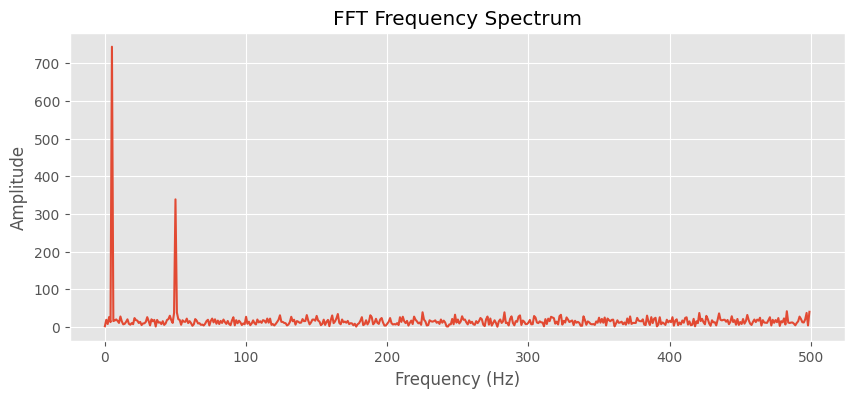

In [11]:
#FFT Frequency Analysis
N = len(signal_noisy)
fft_vals = np.abs(fft(signal_noisy))
freqs = fftfreq(N, 1/fs)

plt.figure(figsize=(10,4))
plt.plot(freqs[:N//2], fft_vals[:N//2])
plt.title("FFT Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()